In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
df = pd.read_csv("D:\IDS PROJECT\laptops.csv",sep=',')

In [3]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1339.69
1,NaN,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.86,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,NaN,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [4]:
df.isnull().sum()

Company              67
Product               0
TypeName              0
Inches              113
ScreenResolution      0
Cpu                   0
Ram                 196
Memory                0
Gpu                   0
OpSys                 0
Weight              202
Price_euros           0
dtype: int64

In [5]:
sample=df
sample.head(50)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1339.69
1,NaN,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.860000,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.860000,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,NaN,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370000,1803.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4.0,500GB HDD,AMD Radeon R5,Windows 10,2.100000,400.00
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.0,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.040000,2139.97
7,NaN,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.0,512GB SSD,Nvidia GeForce MX150,Windows 10,1.300000,1495.00
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,NaN,256GB SSD,Intel UHD Graphics 620,Windows 10,1.600000,770.00


In [6]:
sample.describe()

,Inches,Ram,Weight,Price_euros
count,1190.000000,1107.000000,1101.000000,1303.000000
mean,14.997983,8.345077,2.049114,1123.686992
std,1.417040,5.010674,0.677242,699.009043
min,10.100000,2.000000,0.690000,174.000000
25%,14.000000,4.000000,1.540000,599.000000
50%,15.600000,8.000000,2.040000,977.000000
75%,15.600000,8.000000,2.300000,1487.880000
max,18.400000,64.000000,4.700000,6099.000000


In [7]:
#interpolation
interpol=df.interpolate(method ='linear', limit_direction ='forward')
interpol.head(50)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1339.69
1,NaN,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,898.94
2,HP,250 G6,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.860000,575.00
3,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.860000,2537.45
4,Apple,MacBook Pro,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,10.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370000,1803.60
5,Acer,Aspire 3,Notebook,15.60,1366x768,AMD A9-Series 9420 3GHz,4.0,500GB HDD,AMD Radeon R5,Windows 10,2.100000,400.00
6,Apple,MacBook Pro,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.0,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.040000,2139.97
7,NaN,Macbook Air,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8.0,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.00,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.0,512GB SSD,Nvidia GeForce MX150,Windows 10,1.300000,1495.00
9,Acer,Swift 3,Ultrabook,14.00,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,10.0,256GB SSD,Intel UHD Graphics 620,Windows 10,1.600000,770.00


In [8]:
#typecast
temp=pd.to_numeric(sample['Ram'])
sample['Ram']=temp
sample['Ram']

0        8.0
1        8.0
2        8.0
3       16.0
4        NaN
        ... 
1298     4.0
1299    16.0
1300     2.0
1301     6.0
1302     4.0
Name: Ram, Length: 1303, dtype: float64

In [9]:
#typecast
temp=pd.to_numeric(sample['Inches'])
sample['Inches']=temp
sample['Inches']

0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
        ... 
1298     NaN
1299    13.3
1300    14.0
1301    15.6
1302    15.6
Name: Inches, Length: 1303, dtype: float64

In [10]:
#typecast
temp=pd.to_numeric(sample['Weight'])
sample['Weight']=temp
sample['Weight']

0        NaN
1       1.34
2       1.86
3       1.86
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301     NaN
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [11]:
#typecast
temp=pd.to_numeric(sample['Price_euros'])
sample['Price_euros']=temp
sample['Price_euros']

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [12]:
#data cleaning for numerical column
sample['Ram']=sample['Ram'].fillna(sample['Ram'].mean())
sample['Ram']

0        8.000000
1        8.000000
2        8.000000
3       16.000000
4        8.345077
          ...    
1298     4.000000
1299    16.000000
1300     2.000000
1301     6.000000
1302     4.000000
Name: Ram, Length: 1303, dtype: float64

In [13]:
#data cleaning for numerical column
sample['Weight']=sample['Weight'].fillna(sample['Weight'].mean())
sample['Weight']

0       2.049114
1       1.340000
2       1.860000
3       1.860000
4       1.370000
          ...   
1298    1.800000
1299    1.300000
1300    1.500000
1301    2.049114
1302    2.200000
Name: Weight, Length: 1303, dtype: float64

In [14]:
#data cleaning for numerical column
sample['Inches']=sample['Inches'].fillna(sample['Inches'].mean())
sample['Inches']

0       13.300000
1       13.300000
2       15.600000
3       15.400000
4       13.300000
          ...    
1298    14.997983
1299    13.300000
1300    14.000000
1301    15.600000
1302    15.600000
Name: Inches, Length: 1303, dtype: float64

In [15]:
#categoirical cleaning
sample['Company']=sample['Company'].fillna(method='ffill')
sample['Company']

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1298    Lenovo
1299    Lenovo
1300    Lenovo
1301        HP
1302      Asus
Name: Company, Length: 1303, dtype: object

In [16]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [16]:
sample.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [17]:
sample.head(50)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.300000,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.000000,128GB SSD,Intel Iris Plus Graphics 640,macOS,2.049114,1339.69
1,Apple,Macbook Air,Ultrabook,13.300000,1440x900,Intel Core i5 1.8GHz,8.000000,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,898.94
2,HP,250 G6,Notebook,15.600000,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.000000,256GB SSD,Intel HD Graphics 620,No OS,1.860000,575.00
3,Apple,MacBook Pro,Ultrabook,15.400000,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.000000,512GB SSD,AMD Radeon Pro 455,macOS,1.860000,2537.45
4,Apple,MacBook Pro,Ultrabook,13.300000,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.345077,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.370000,1803.60
5,Acer,Aspire 3,Notebook,15.600000,1366x768,AMD A9-Series 9420 3GHz,4.000000,500GB HDD,AMD Radeon R5,Windows 10,2.100000,400.00
6,Apple,MacBook Pro,Ultrabook,15.400000,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.000000,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.040000,2139.97
7,Apple,Macbook Air,Ultrabook,13.300000,1440x900,Intel Core i5 1.8GHz,8.000000,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.340000,1158.70
8,Asus,ZenBook UX430UN,Ultrabook,14.000000,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.000000,512GB SSD,Nvidia GeForce MX150,Windows 10,1.300000,1495.00
9,Acer,Swift 3,Ultrabook,14.000000,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8.345077,256GB SSD,Intel UHD Graphics 620,Windows 10,1.600000,770.00


In [122]:
unique_Company = list(df['Company'].unique())
Ram = []

for Company in unique_Company:
    x = df[df['Company'] == Company]
    average_Ram = x['Ram'].sum()/len(x)
    Ram.append(average_Ram)
data = pd.DataFrame({'Company':unique_Company, 'Ram':Ram})
new_index = (data['Ram'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

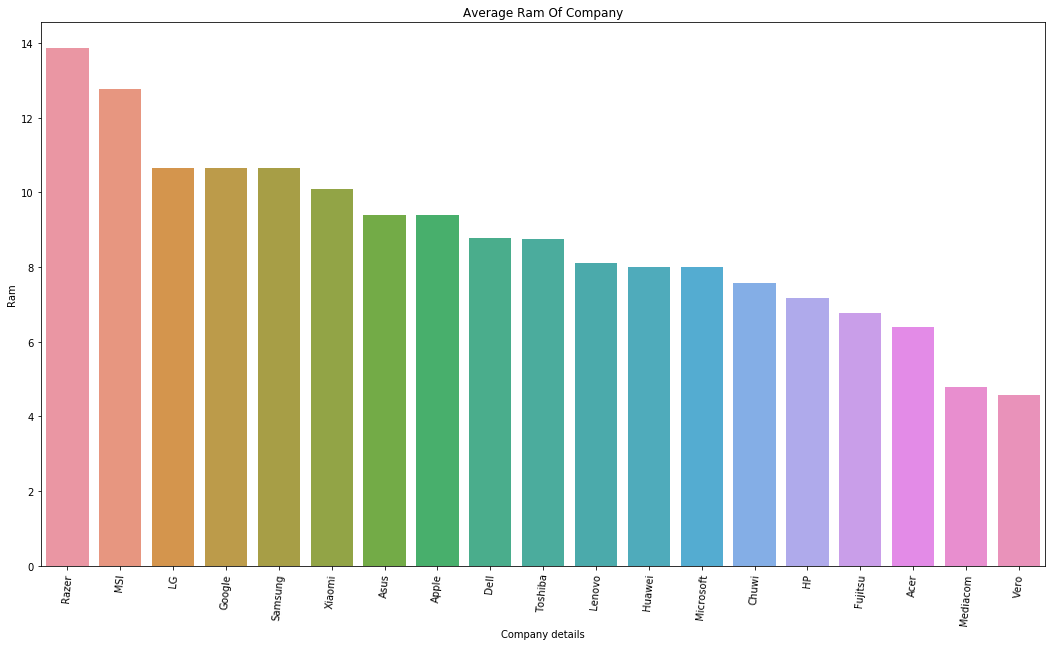

In [124]:
#bar graph
plt.figure(figsize=(18,10))
sns.barplot(x=sorted_data['Company'], y=sorted_data['Ram'])

plt.xticks(rotation = 85)
plt.xlabel('Company details')
plt.ylabel('Ram')
plt.title('Average Ram Of Company')
plt.show()

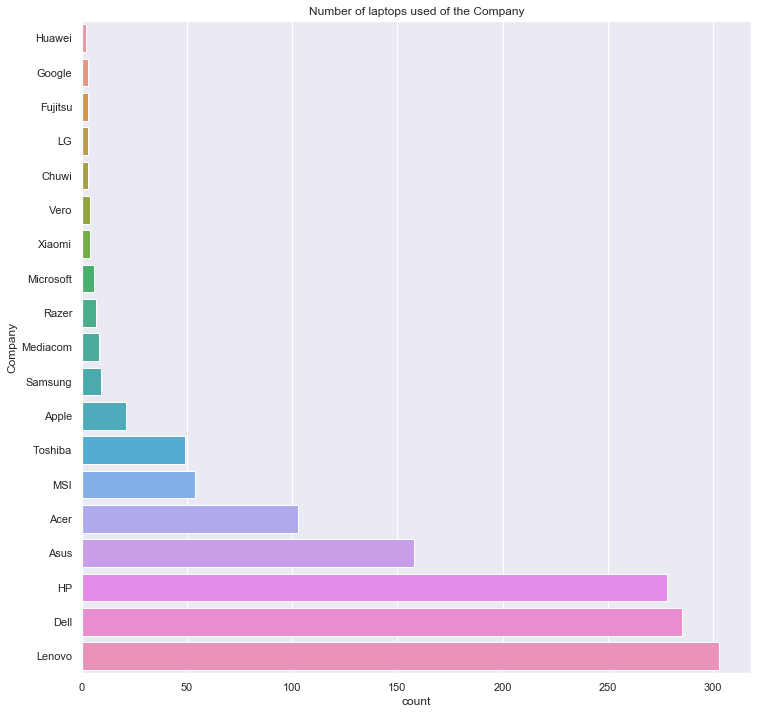

In [125]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,12))
sns.countplot(y='Company',data=df,order=df['Company'].value_counts(ascending=True).index)
plt.title('Number of laptops used of the Company')
plt.show()

In [18]:
Company=sample['Company']
Product=sample['Product']
TypeName=sample['TypeName']
ScreenResolution=sample['ScreenResolution']
Inches=sample['Inches']
Cpu=sample['Cpu']
Ram=sample['Ram']
Memory=sample['Memory']
Gpu=sample['Gpu']
OpSys=sample['OpSys']
Weight=sample['Weight']
Price_euros=sample['Price_euros']

In [19]:
import matplotlib.pyplot as plt

In [20]:
type(Ram)

pandas.core.series.Series

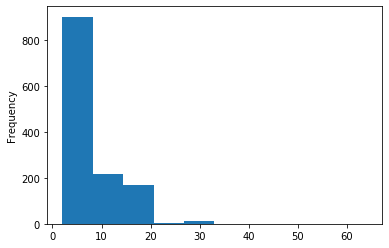

In [21]:
#histogram
Ram.plot.hist()
plt.savefig('D:\IDS PROJECT\Ram_hist.jpg')

In [22]:
type(Weight)

pandas.core.series.Series

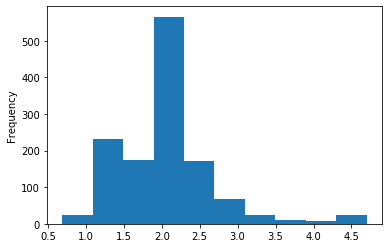

In [23]:
#histogram
Weight.plot.hist()
plt.savefig('D:\IDS PROJECT\Weight_hist.jpg')

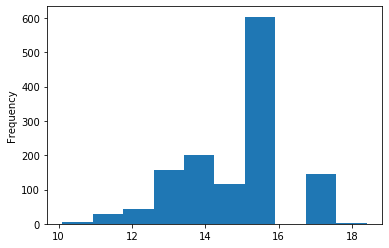

In [24]:
#histogram
Inches.plot.hist()
plt.savefig('D:\IDS PROJECT\Inches_hist.jpg')

In [25]:
import seaborn as sns

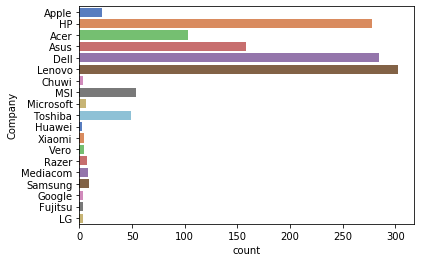

In [26]:
s=sns.countplot(y='Company', data=sample, palette="muted")
plt.savefig('D:\IDS PROJECT\Company_countplot.jpg')

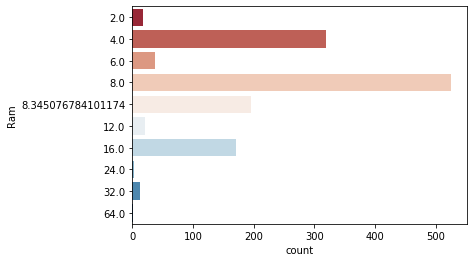

In [28]:
s=sns.countplot(y='Ram', data=sample, palette="RdBu")
plt.savefig('D:\IDS PROJECT\Ram_countplot.jpg')

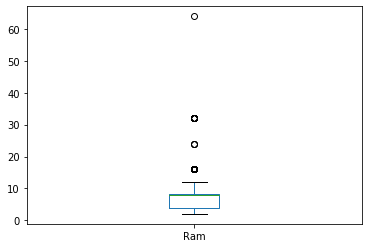

In [29]:
#boxplot
sample['Ram'].plot.box()
plt.savefig('D:\IDS PROJECT\Ram_box.jpg')

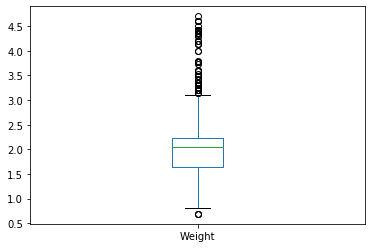

In [30]:
#boxplot
sample['Weight'].plot.box()
plt.savefig('D:\IDS PROJECT\Weight_box.jpg')

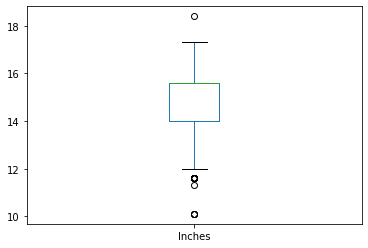

In [31]:
#boxplot
sample['Inches'].plot.box()
plt.savefig('D:\IDS PROJECT\Inches_box.jpg')

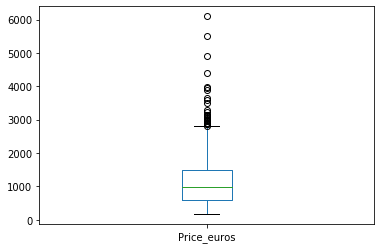

In [32]:
#boxplot
sample['Price_euros'].plot.box()
plt.savefig('D:\IDS PROJECT\Price_box.jpg')

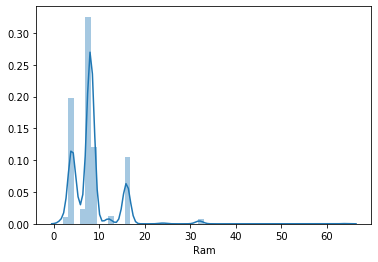

In [33]:
#distribution
sns.distplot(sample['Ram'])
plt.savefig('D:\IDS PROJECT\Ram_dist.jpg')

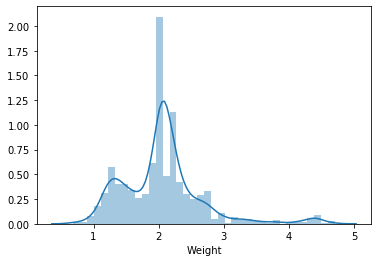

In [34]:
#distribution
sns.distplot(sample['Weight'])
plt.savefig('D:\IDS PROJECT\Weight_dist.jpg')

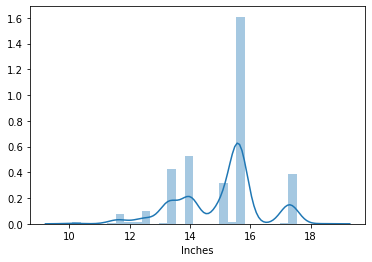

In [35]:
#distribution
sns.distplot(sample['Inches'])
plt.savefig('D:\IDS PROJECT\Inches_dist.jpg')

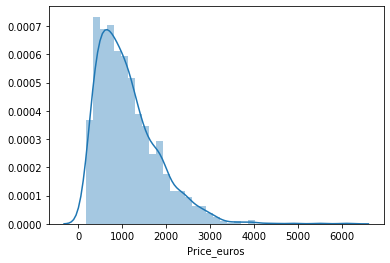

In [36]:
#distribution
sns.distplot(sample['Price_euros'])
plt.savefig('D:\IDS PROJECT\Price_dist.jpg')

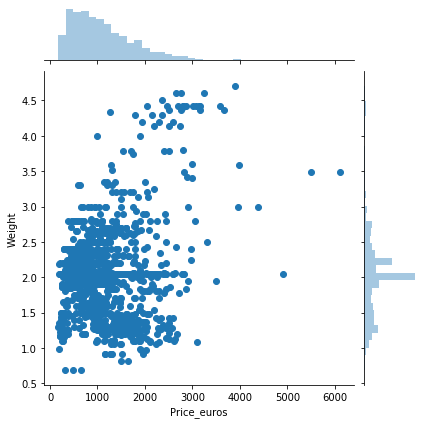

In [44]:
#scatter plot
sns.jointplot(x='Price_euros',y='Weight',data=sample,kind='scatter')
plt.savefig('D:\IDS PROJECT\WEight_PRICE_scat.jpg')

In [53]:
#qqpplot
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot 

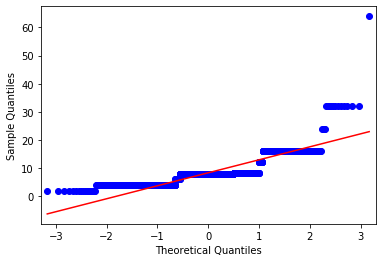

In [55]:
qqplot(sample['Ram'],line='s')
plt.savefig('D:\IDS PROJECT\Ramqqplot.jpg')

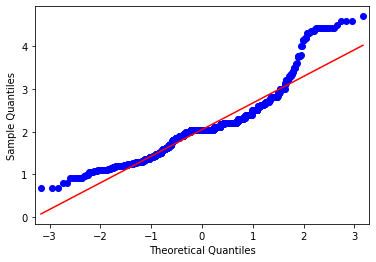

In [56]:
qqplot(sample['Weight'],line='s')
plt.savefig('D:\IDS PROJECT\weightqqplot.jpg')

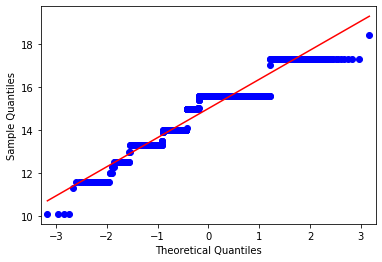

In [57]:
qqplot(sample['Inches'],line='s')
plt.savefig('D:\IDS PROJECT\Inchesqqplot.jpg')

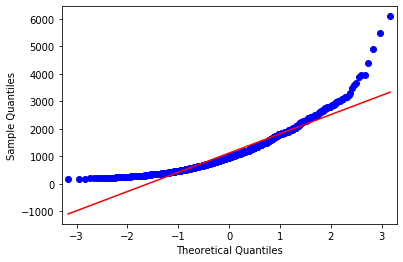

In [62]:
qqplot(sample['Price_euros'],line='s')
plt.savefig('D:\IDS PROJECT\priceqqplot.jpg')

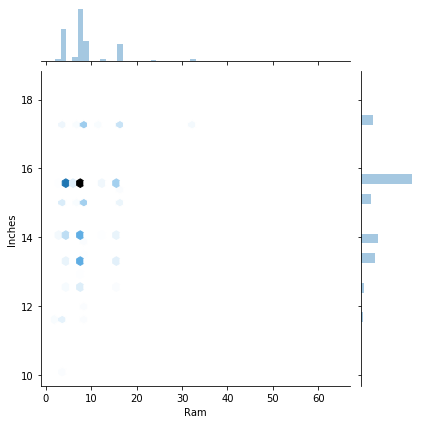

In [64]:
#hexaplot
sns.jointplot(x='Ram',y='Inches',data=sample,kind='hex')

In [65]:
from scipy.stats import norm
from math import sqrt

In [66]:
sam=df.sample(500)

In [67]:
sam['Ram'].mean()

8.31728274616081

In [68]:
#hypothesis testing for ram
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    

alpha = 0.05
sample_mean = sam['Ram'].mean()
pop_mean = sample['Ram'].mean()
sample_size =  500
std_dev = sample['Ram'].std()

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ = 8.345076784101165
H1 : μ != 8.345076784101165
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : -0.13457625146308785 

Failed to reject NULL hypothesis


In [69]:
#one sided hypothesis test(for smaller than in NULL hypothesis) for Weight
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean =sam['Weight'].mean()
pop_mean = sample['Weight'].mean()
sample_size =  500
std_dev =sample['Weight'].std()

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 2.049113728777479
H1 : μ > 2.049113728777479
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -0.15361180947932174 

Failed to reject NULL hypothesis


In [70]:
#hypothesis testing for Inches
def two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha/2))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    

alpha = 0.05
sample_mean = sam['Inches'].mean()
pop_mean = sample['Inches'].mean()
sample_size =  500
std_dev = sample['Inches'].std()

print('H0 : μ =', pop_mean)
print('H1 : μ !=', pop_mean)
print('alpha value is :', alpha, '\n')

reject = two_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ = 14.997983193277186
H1 : μ != 14.997983193277186
alpha value is : 0.05 

actual z value : 1.9599639845400545
hypothesis z value : -0.5706225328242667 

Failed to reject NULL hypothesis


In [71]:
import numpy as np 
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as RMSE

Coefficients: 
 [-0.00011508]
RMSE: 9.26


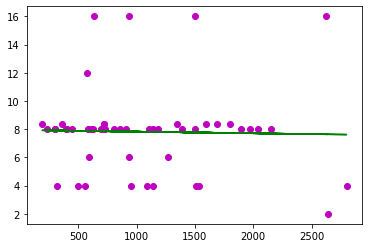

In [80]:
#linear regression
def linear_regression(x, y):
    x = [[i] for i in x]
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)
    
    #prediction 
    y_preds = regr.predict(x)
    
    print('Coefficients: \n', regr.coef_)
    print("RMSE: %.2f" % RMSE(y, y_preds))
    
    plt.scatter(x, y,  color='m')
    plt.plot(x, y_preds, color='g')
    plt.show()
    
y = sample['Ram'].sample(50)
x = sample['Price_euros'].sample(50)
linear_regression(x, y)

Coefficients: 
 [0.0005117]
RMSE: 1.37


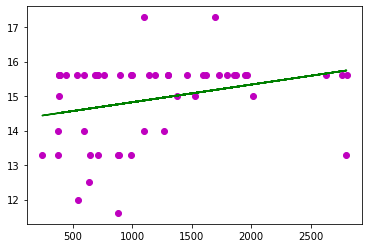

In [85]:
#linear regression
def linear_regression(x, y):
    x = [[i] for i in x]
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)
    
    #prediction 
    y_preds = regr.predict(x)
    
    print('Coefficients: \n', regr.coef_)
    print("RMSE: %.2f" % RMSE(y, y_preds))
    
    plt.scatter(x, y,  color='m')
    plt.plot(x, y_preds, color='g')
    plt.show()
    
y = sample['Inches'].sample(50)
x = sample['Price_euros'].sample(50)
linear_regression(x, y)

In [86]:
samples=sample.sample(50)

In [87]:
#z value
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [88]:
mu = sample['Ram'].mean()
x = sample['Ram'].mean()
sigma = sample['Ram'].std()
z = (x - mu)/sigma
print('Finding P(z <',z,')')
print('Area to left of x : ',norm.cdf(z))

print('Finding P(z >', z,')')
print('Area to right of x : ',1 - norm.cdf(1.1))

Finding P(z < 0.0 )
Area to left of x :  0.5
Finding P(z > 0.0 )
Area to right of x :  0.13566606094638267


In [91]:
mu = sample['Price_euros'].mean()
x = sample['Price_euros'].mean()
sigma = sample['Price_euros'].std()
z = (x - mu)/sigma
print('Finding P(z <',z,')')
print('Area to left of x : ',norm.cdf(z))

print('Finding P(z >', z,')')
print('Area to right of x : ',1 - norm.cdf(1.1))

Finding P(z < 0.0 )
Area to left of x :  0.5
Finding P(z > 0.0 )
Area to right of x :  0.13566606094638267


In [92]:
from sklearn import preprocessing

In [94]:
print('Mean before standardization:\nRam={:.2f}, Price_euros={:.2f},Inches={:.2f},Weight={:.2f}'
      .format(sample['Ram'].mean(), sample['Price_euros'].mean(), sample['Inches'].mean(), sample['Weight'].mean()))
print('\nStandard deviation before standardization:\nRam={:.2f}, Price_euros={:.2f},Inches={:.2f},Weight={:.2f}'
      .format(sample['Ram'].std(), sample['Price_euros'].std(), sample['Inches'].std(), sample['Weight'].std()))

Mean before standardization:
Ram=8.35, Price_euros=1123.69,Inches=15.00,Weight=2.05

Standard deviation before standardization:
Ram=4.62, Price_euros=699.01,Inches=1.35,Weight=0.62


In [95]:
std_scale = preprocessing.StandardScaler().fit(sample[['Ram', 'Price_euros','Inches','Weight']])
df_std = std_scale.transform(sample[['Ram', 'Price_euros','Inches','Weight']])

In [98]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Ram', 'Price_euros','Inches','Weight']])
df_minmax = minmax_scale.transform(df[['Ram', 'Price_euros','Inches','Weight']])

In [99]:
print('Mean after standardization:\nRam={:.2f}, Price_euros={:.2f},Inches={:.2f},Weight={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,2].mean(), df_std[:,3].mean()))
print('\nStandard deviation after standardization:\nRam={:.2f}, Price_euros={:.2f},Inches={:.2f},Weight={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].std(), df_std[:,3].std()))

Mean after standardization:
Ram=0.00, Price_euros=0.00,Inches=0.00,Weight=0.00

Standard deviation after standardization:
Ram=1.00, Price_euros=1.00,Inches=1.00,Weight=1.00


In [100]:
std_Mean=pd.Series(df_std[:,0])
std_std=pd.Series(df_std[:,1])

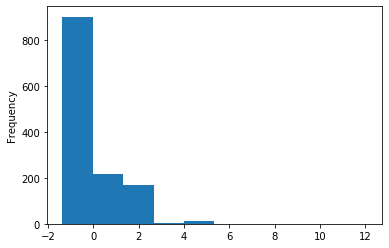

In [101]:
std_Mean.plot.hist()
plt.savefig('D:\IDS Project\STANDARDISED_MEAN.jpg')

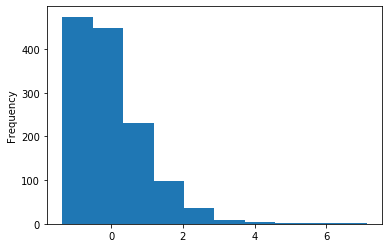

In [102]:
std_std.plot.hist()
plt.savefig('D:\IDS Project\STANDARDISED_STD_DEV.jpg')

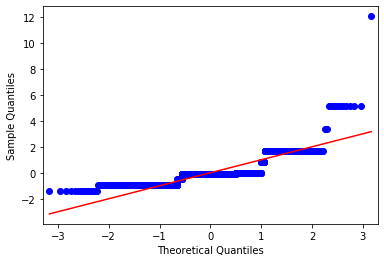

In [104]:
qqplot(std_Mean,line='s')
plt.savefig('D:\IDS Project\QQ_STANDARDISED_MEAN.jpg')

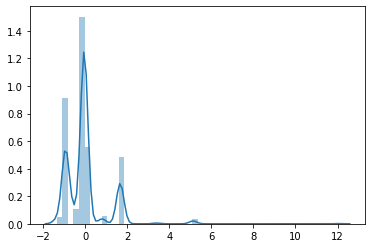

In [105]:
sns.distplot(std_Mean)
plt.savefig('D:\IDS Project\DIST_STANDARDISED_MEAN.jpg')

In [106]:
import decimal
import numpy as np
import scipy.stats as stats
import pylab as pl
import matplotlib.pyplot as plt
from decimal import *
from scipy.stats import norm

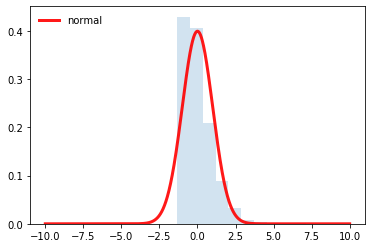

In [108]:
lines=std_std
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')

#Here I delete some lines aimed to fill the list with values

Long = len(lines)
Maxim = max(lines) #MaxValue
Minim = min(lines) #MinValue
av = np.mean(lines) #Average
StDev = np.std(lines) #Standard Dev.

x = np.linspace(-10, +10, Long)
ax.plot(x, norm.pdf(x, av, StDev),'r-', lw=3, alpha=0.9, label='normal')

weights = np.ones_like(lines)/len(lines)

ax.hist(lines, weights = weights, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.savefig('D:\IDS PROJECT\stad_normal_std.jpg')
plt.show()

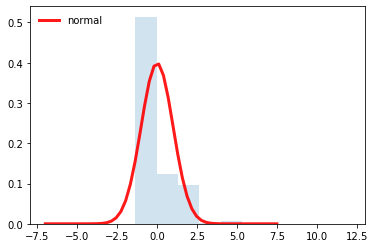

In [112]:
lines=std_Mean
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')

#Here I delete some lines aimed to fill the list with values

Long = len(lines)
Maxim = max(lines) #MaxValue
Minim = min(lines) #MinValue
av = np.mean(lines) #Average
StDev = np.std(lines) #Standard Dev.

x = np.linspace(-7, +7.5)
ax.plot(x, norm.pdf(x, av, StDev),'r-', lw=3, alpha=0.9, label='normal')
weights = np.ones_like(lines)/len(lines)

ax.hist(lines, weights = weights, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.savefig('D:\IDS PROJECT\stad_normal_Mean.jpg')
plt.show()


In [1]:
##df.to_csv("D:\IDS PROJECT\laptops.csv",sep=',')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
%matplotlib inline

In [6]:
df = pd.read_csv("D:\IDS PROJECT\laptops.csv",sep=',')

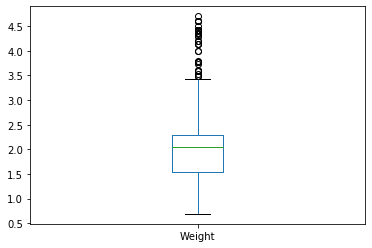

In [7]:
sample=df
sample['Weight'].plot.box()

In [8]:
res=sample.Weight.quantile([0.25,0.75])
true_index=(res.loc[0.25]<sample.Weight) & (sample.Weight<res.loc[0.75])
sample.Weight=sample.Weight[true_index]
sample['Weight'].fillna(method="bfill",inplace=True)
sample.fillna(sample.median(skipna=True),inplace=True)
sample

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.86,1339.69
1,NaN,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.86,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.86,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,2.10,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16.0,512GB SSD,Intel HD Graphics 520,Windows 10,2.20,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,2.20,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.20,764.00


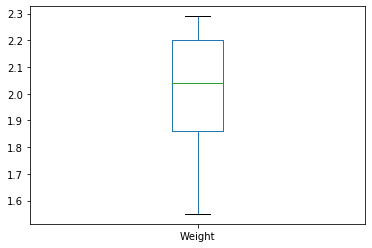

In [10]:
sample=df
sample['Weight'].plot.box()
plt.savefig('D:\IDS PROJECT\Weightboxno outliers.jpg')

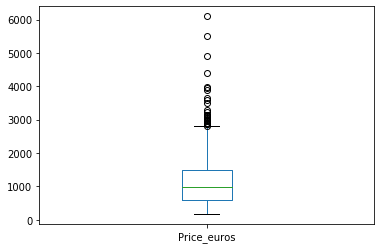

In [13]:
sample['Price_euros'].plot.box()

In [14]:
new=sample.Price_euros.quantile([0.25,0.75])
true_index=(new.loc[0.25]<sample.Price_euros) & (sample.Price_euros<new.loc[0.75])
sample.Price_euros=sample.Price_euros[true_index]
sample['Price_euros'].fillna(method="bfill",inplace=True)
sample.fillna(sample.median(skipna=True),inplace=True)
sample

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,6.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.86,1339.69
1,NaN,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,6.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.86,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,1158.70
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,6.0,512GB SSD,AMD Radeon Pro 455,macOS,1.86,1158.70
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,6.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,2.10,1158.70
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,6.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,6.0,512GB SSD,Intel HD Graphics 520,Windows 10,2.20,764.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,6.0,64GB Flash Storage,Intel HD Graphics,Windows 10,2.20,764.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.20,764.00


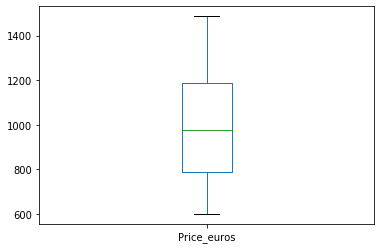

In [16]:
sample['Price_euros'].plot.box()
plt.savefig('D:\IDS PROJECT\Priceboxno outliers.jpg')

In [17]:
print(df.corr(method='pearson'))

               Inches  Ram    Weight  Price_euros
Inches       1.000000  NaN  0.159477    -0.051564
Ram               NaN  NaN       NaN          NaN
Weight       0.159477  NaN  1.000000    -0.073288
Price_euros -0.051564  NaN -0.073288     1.000000


In [19]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,6.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.86,1339.69
1,NaN,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,6.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.86,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,1158.70
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,6.0,512GB SSD,AMD Radeon Pro 455,macOS,1.86,1158.70
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,6.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,2.10,1158.70
